# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [3]:
data.sample(10)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
349,5981,14641,20521,2005,12218,445
35,688,5491,11091,833,4239,436
254,10379,17972,4748,4686,1547,3265
286,7149,2247,1242,1619,1226,128
320,1774,3696,2280,514,275,834
266,572,9763,22182,2221,4882,2563
85,16117,46197,92780,1026,40827,2944
335,27082,6817,10790,1365,4111,2139
146,7769,1936,2177,926,73,520
307,17327,2374,2842,1149,351,925


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [4]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [22,28,177]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,31276,1917,4469,9408,2381,4334
1,4113,20484,25957,1158,8604,5206
2,12759,7330,4533,1752,20,2631


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**
- 1.The first selected customer in the sample seems to be a 'Restaurant'- based on the signficantly higher spending on "Fresh" and "Frozen" products , relative to the other product categories.
- 2.The second selected customer seems to be a 'Retail Supermarket' - based on the significantly higher spending on Grocery,Milk and Detergents_Paper relative to the other products.
- 3.The third selected customer seems to be a 'Cafe' looking at the overall volumes and the relatively higher spending on Milk and Fresh categories

In [5]:
samples/data.describe().loc['50%'] # Compare the product category values in samples with respect to their median in data set

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,3.677799,0.528536,0.939754,6.165138,2.916105,4.488866
1,0.483655,5.647643,5.458311,0.758847,10.537661,5.392025
2,1.500353,2.020954,0.953212,1.148100,0.024495,2.725013


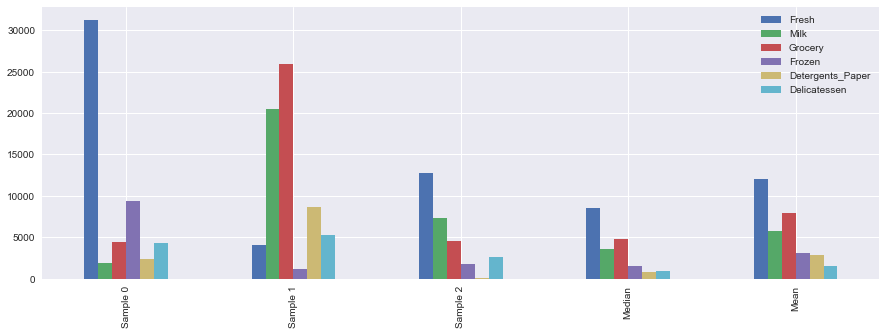

In [6]:
samples_plot = samples.copy()
samples_plot.loc[3] = data.median()
samples_plot.loc[4] = data.mean()

labels = ['Sample 0', 'Sample 1', 'Sample 2', 'Median', 'Mean']
samples_plot.plot(kind='bar', figsize=(15, 5))
plt.xticks(range(5), labels)
plt.show()

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [7]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature 
# DROPPING 'Delicatessen' feature

new_data = data.drop(['Delicatessen'], axis=1)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Delicatessen'], test_size=0.25, random_state = 42)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train,y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test,y_test)

print (score)

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


-2.254711537203931


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**
- I attempted to predict the "Delicatessen" feature
- The reported R^2 score is -2.2547
- This feature will be necessary for identifying customers' spending habits. A negative score of R^2 implies that the predictive model without the "Delicatessen" feature fails to fit the data.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

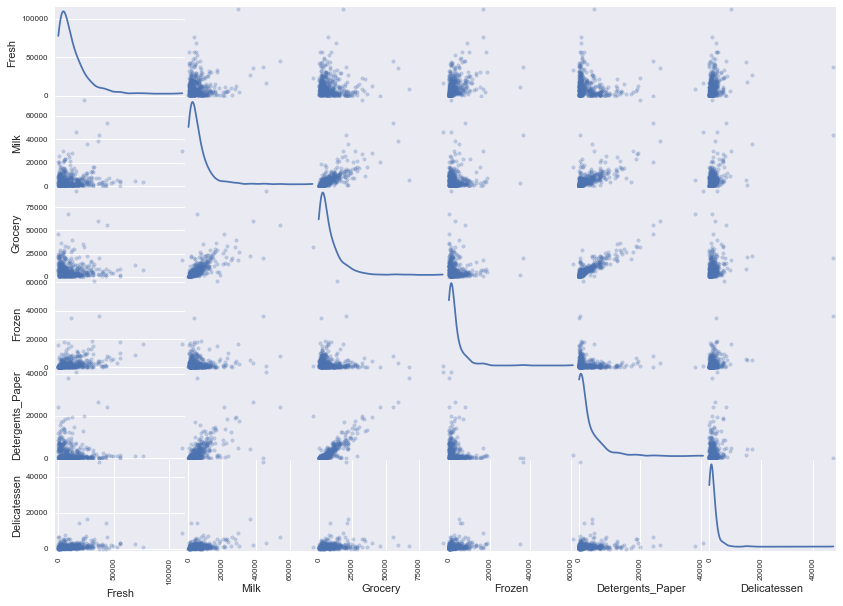

In [8]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,10), diagonal = 'kde');

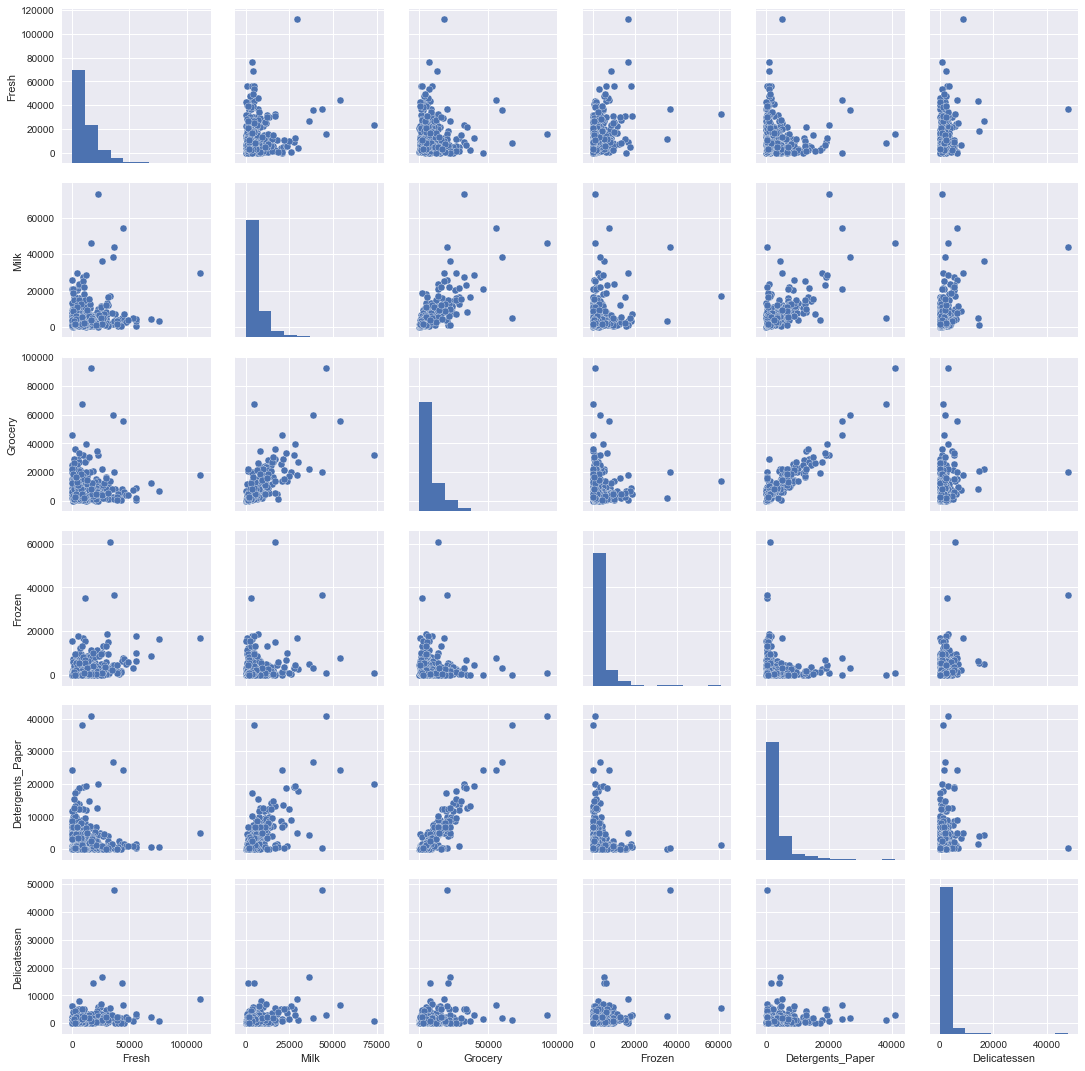

In [9]:
sns.pairplot(data); #  another shot at data distribution of features

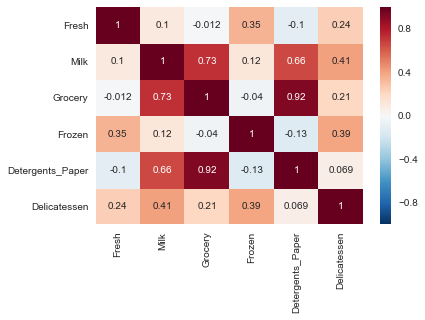

In [10]:
sns.heatmap(data.corr(), annot = True) # To find the correlation between features

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**
- None of the features exhibit a normal distribution - All distributions are right-skewed, with a heavy concentration of data points towards the left side. We notice some outliers towards the extreme right side of the plots.
- Features displaying some degree of correlation :
While the scatter plot does give us a reasonable sense of the correlation between features, the correlation heatmap makes it very clear.We see a High degree of correlation between Grocery and Detergents_Paper (0.92) , Grocery and Milk (0.73) & Detergents_Paper and Milk(0.66) also display some degree of correlation.
- The feature ('Delicatessen') that we tried to predict - Looking at the plot it is clear that it has a low degree of correlation with other features. This is consistent with our inference obtained from the negative R^2 score, which indicates that we cannot predict the feature ('Delicatessen') from other features.
- All the features as mentioned above have a right-skewed distribution

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

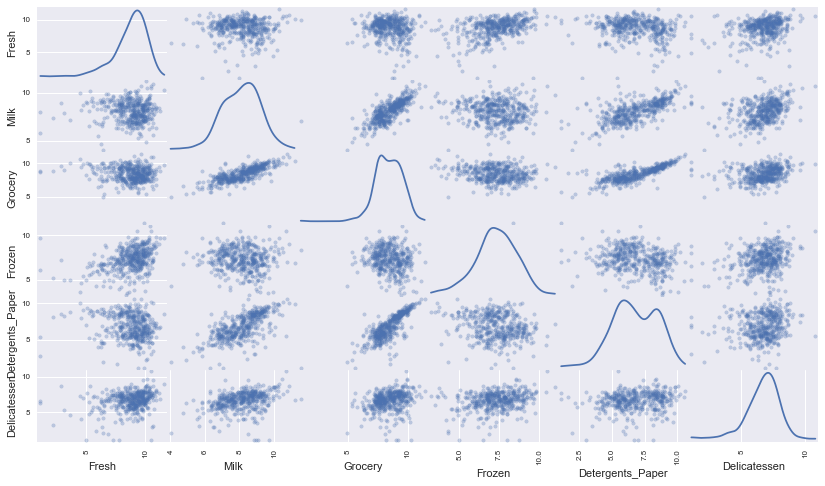

In [11]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [12]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.350606,7.558517,8.404920,9.149316,7.775276,8.374246
1,8.321908,9.927399,10.164197,7.054450,9.059982,8.557567
2,9.453992,8.899731,8.419139,7.468513,2.995732,7.875119


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [13]:
# For each feature find the data points with extreme high or low values
outliers =[]
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 *(Q3-Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    print("The Lower fence = {0:.2f}".format(Q1-step))
    print("The Upper fence = {0:.2f}".format(Q3+step))
    print("Outlier Count : ",len(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
    
# OPTIONAL: Select the indices for data points you wish to remove

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':
The Lower fence = 5.51
The Upper fence = 12.27
Outlier Count :  16


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':
The Lower fence = 5.02
The Upper fence = 11.20
Outlier Count :  4


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':
The Lower fence = 5.28
The Upper fence = 11.67
Outlier Count :  2


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':
The Lower fence = 4.26
The Upper fence = 10.53
Outlier Count :  10


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':
The Lower fence = 1.46
The Upper fence = 12.36
Outlier Count :  2


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':
The Lower fence = 3.77
The Upper fence = 9.75
Outlier Count :  14


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**
- There are 42 outliers in the entire dataset across all the features.
The data points with following indices have been identified as outliers across more than 1 feature:
154 - Milk, Grocery & Delicatessen ; 65 - Fresh & Frozen ; 66 - Fresh & Delicatessen ; 75 - Grocery & Detergents_Paper ;
128 - Fresh & Delicatessen.

- We should not remove the above points that are being considered as outliers, for the following reasons :
154 - Milk and Grocery categories have a reasonable correlation - In this data point, we notice that along with these values being low, the value for detergents and paper is also low - So this may indicate a small volume customer.
65 - Though the values for Fresh and Frozen categories of product is low, the values for Milk, Grocery and Detergents_Paper are high - which means the customer is a Retail Store.
66 and 128 - The explanation is similar to the above explanation for 65.
75 - Here the Grocer and Detergent_paper are relatively much higher - which means the customer could be in the Restaurant /Food business. 

- In general , I would not want to remove even other outliers before further exploration because not only do these form around 10% of the overall data, but also we can't look at each category independently for considering a point as an outlier. 

Finally on a quick scan of the points being considered as outliers - we can notice that these are not outliers when we compare them with other product categories and the probable customer profile.


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

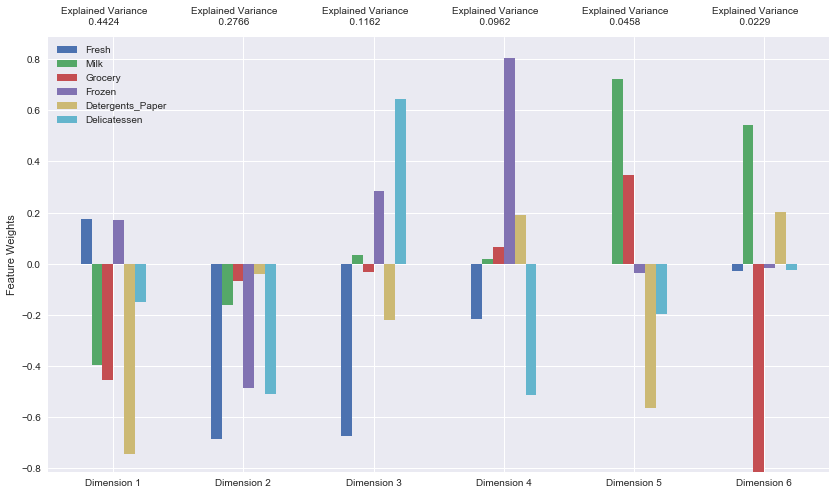

In [14]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components= len(good_data.columns))
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot

pca_results = vs.pca_results(good_data, pca);

In [15]:
display(pca_results['Explained Variance'].cumsum())

Dimension 1    0.4424
Dimension 2    0.7190
Dimension 3    0.8352
Dimension 4    0.9314
Dimension 5    0.9772
Dimension 6    1.0001
Name: Explained Variance, dtype: float64

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**
- The total variance explaned by the first and second principal components = 0.4424 + 0.2766 = 0.719 = 71.9%
- The total variance explaned by the first four principal components = 0.9314 = 93.14%


- The Dimension 1 captures the largest variation of entire data set and comprises categories "Detergents_paper", "Grocery" and "Milk" as the most significant components that add up, also indicates unlikelihood of needing items in "Fresh" or "Frozen" categories. The spend pattern indicates the customer is a Retail Supermarket or Convenience Store.

- The Dimension 2 captures the second largest variation and comprises  "Fresh" , "Frozen" and "Delicatessen" as the major product categories that add up along with other categories at lower levels. This spend pattern indicates that the customer is most likely a Restaurant.

- The Dimension 3 has categories "Delicatessen" and "Frozen" as the primary components. The spend pattern indicates that customer is probably a 'Deli'.

- The Dimension 4 has "Frozen" as the single most dominant component with "Detergent_paper" in smaller proportion and unlikelihood of Fresh and Delicatessen. This spend pattern indicates that the customer may probably be a cold storage business.


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [16]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-0.1549,-2.8299,0.3035,0.4400,-1.3788,-0.1944
1,-3.5870,-1.0724,0.9327,-0.5064,0.2621,0.0119
2,2.5022,-1.1600,1.1940,-1.3490,2.4482,-0.3782


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [17]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [18]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-0.1549,-2.8299
1,-3.5870,-1.0724
2,2.5022,-1.1600


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

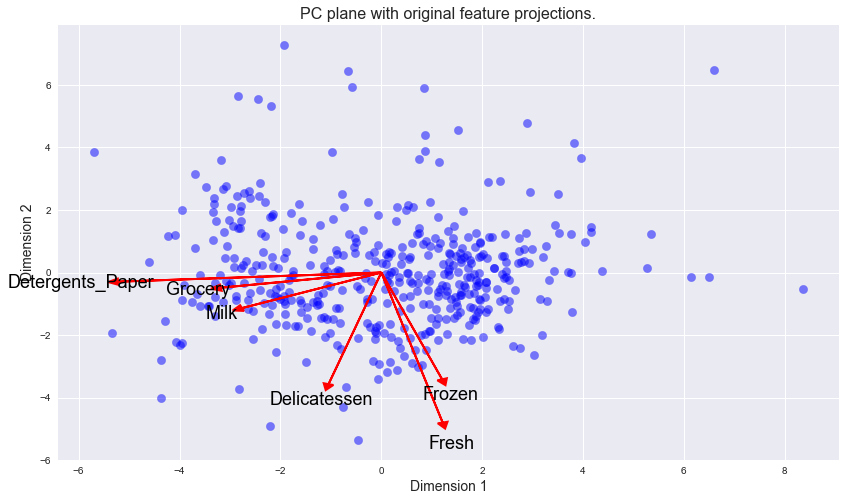

In [19]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca);

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

- Answer : The biplot shows that 'Detergents_Paper' , 'Grocery' and 'Milk' Categories have a strong orientation towards Dimension 1 and 'Fresh' , 'Frozen' and 'Delicatessen' have a strong orientation towards Dimension 2.  
This is consistent with the results of the plot of pca_results.

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**
- Advantages of K-Means clustering algorithm :
 It is very easy to understand and implement.
 It has a fast execution and is well suited in situations with lots of data.
 It works well where clusters are clearly seperable and are typically "circular-ish" in shape. 

- Advantages of Gaussian Mixture Model clustering algorithm:
 It is more flexible than K-Means since it works on the principle of "soft clustering", where a point has membership in  more than 1 cluster.
 It can accommodate clusters that have different sizes and correlation structures.Thus works better than K-Means when the Cluster are not separated clearly or shape is not circular-ish or is irregular.

- While we don't know how much better an algorithm based on GMM would perform over K-Means in this case, I would go for algorithm based on GMM clustering given that we do not see clear-cut circular-ish clusters in the above plot. It seems more likely to do better than K-Means.


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [20]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn import mixture
from sklearn.metrics import silhouette_score

# Fit Gaussian Mixture Model Clustering to reduced_data
clusterer = mixture.GaussianMixture(n_components=2)
clusterer.fit(reduced_data)
    
# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data,preds)
print(score)

0.410366734626858


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

In [34]:
for k in range(2,15):
    clusterer_iter = mixture.GaussianMixture(n_components=k)
    clusterer_iter.fit(reduced_data)
    preds_iter = clusterer_iter.predict(reduced_data)
    print("K = {} : Silhouette Score = {}".format(k,silhouette_score(reduced_data, preds_iter)))

K = 2 : Silhouette Score = 0.410366734626858
K = 3 : Silhouette Score = 0.2330427439652389
K = 4 : Silhouette Score = 0.3078135360262178
K = 5 : Silhouette Score = 0.2297772109618812
K = 6 : Silhouette Score = 0.2468953616493423
K = 7 : Silhouette Score = 0.3219353143677298
K = 8 : Silhouette Score = 0.26794630555153637
K = 9 : Silhouette Score = 0.32234883996482255
K = 10 : Silhouette Score = 0.31010254471841603
K = 11 : Silhouette Score = 0.2970965707292012
K = 12 : Silhouette Score = 0.32454657130428954
K = 13 : Silhouette Score = 0.33985768394028937
K = 14 : Silhouette Score = 0.342096710510366


- The best silhouette score is obtained for 2 clusters (K = 2)

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

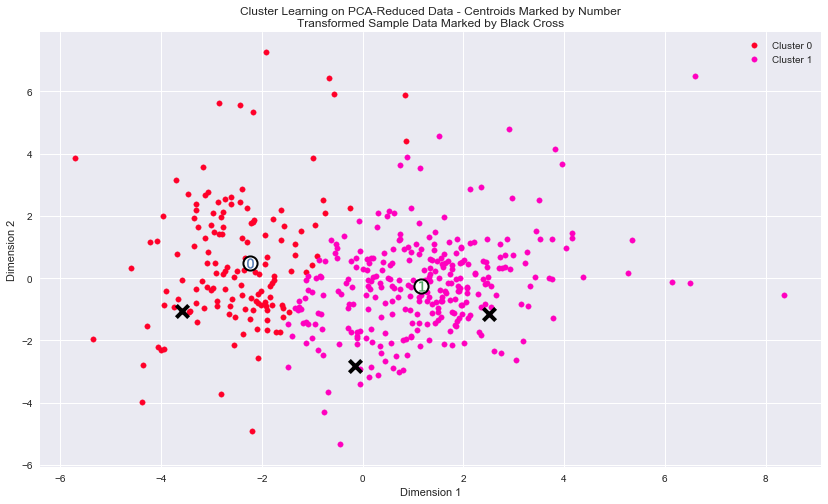

In [38]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [39]:
print(centers)

[[-2.24401856  0.4965554 ]
 [ 1.16649267 -0.25812096]]


In [40]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)
#print(true_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,2982.0,7522.0,12411.0,791.0,4620.0,852.0
Segment 1,9046.0,2215.0,2777.0,2055.0,375.0,752.0


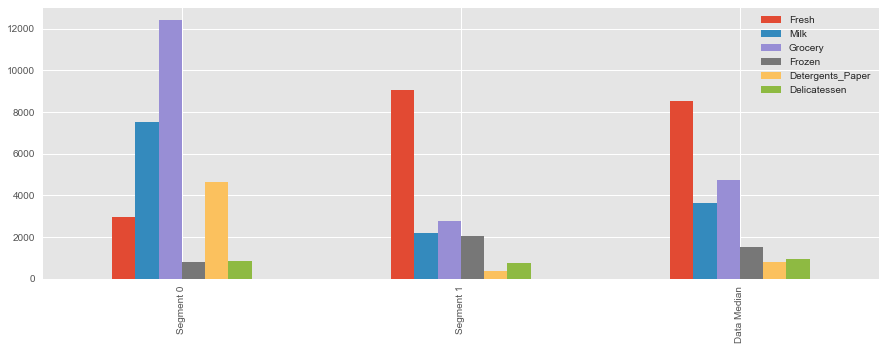

In [41]:
compare = true_centers.copy()
compare.loc[true_centers.shape[0]] = data.median()

plt.style.use('ggplot')
compare.plot(kind='bar', figsize=(15, 5))
labels = true_centers.index.values.tolist()
labels.append('Data Median')
plt.xticks(range(compare.shape[0]), labels)
plt.show()

### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

# **Answer:**

To arrive at the answer, we need to compare a) the  purchase cost of an item relative to the median ( I prefer to us median instead of mean, since the dataset has a skewed distribution)purchase cost of that category and b) compare its purchase cost in the overall basket when compared to cost of other items
Median values for Product Categories computed are as follows :
- Fresh = 8504 , Milk = 3627 , Grocery = 4755 , Frozen = 1526 , Detergent_Paper = 816 , Delicatessen = 965

- Segment 1 - The Customer Type belonging to this segment seems to be a "Restaurant" or "Eatery". This inference can be drawn by looking at the relatively higher spends on "Fresh" and "Frozen" categories of products (which is higher than their corresponding median) also, for other product categories in that data point, spends are lower than their median values. 
- Segment 0 - The Customer Type belonging to this segment seems to be a "Retail Store" or "Super Market". This inference can be drawn by the relatively higher spends on "Grocery", "Detergents and Paper" and "Milk" when compared to the median values and lower spends on other categories like "Fresh and Frozen".

In [42]:
data.describe().loc['50%']

Fresh               8504.0
Milk                3627.0
Grocery             4755.5
Frozen              1526.0
Detergents_Paper     816.5
Delicatessen         965.5
Name: 50%, dtype: float64

In [43]:
true_centers/data.describe().loc['50%'] # Find ratio of product purchase (for the 2 data points) relative to  median Purchase cost in the data set

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,0.350659,2.073890,2.609820,0.518349,5.658298,0.882444
Segment 1,1.063735,0.610698,0.583955,1.346658,0.459277,0.778871


### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [44]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


In [45]:
samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,31276,1917,4469,9408,2381,4334
1,4113,20484,25957,1158,8604,5206
2,12759,7330,4533,1752,20,2631


In [46]:
samples/data.describe().loc['50%'] #  Find ratio of product purchase in sample relative to  median Purchase cost in the data set

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,3.677799,0.528536,0.939754,6.165138,2.916105,4.488866
1,0.483655,5.647643,5.458311,0.758847,10.537661,5.392025
2,1.500353,2.020954,0.953212,1.148100,0.024495,2.725013


# **Answer:**
- The Sample Point 0 can be best categorized under Segment 1. This inference can be drawn by the relatively higher spends on "Fresh" and "Frozen".
- The Sample Point 1 can be best categorized under Segment 0. This inference can be drawn by the relatively higher spends on "Milk" , "Grocery" and "Detergents and paper".
- The Sample Point 0 can be best categorized under Segment 1. This inference can be drawn by the relatively higher spends on  "Milk" and "Fresh". Note that Frozen purchase is also higher than median, so this could be kind of a small Restaurant/Cafe

- In general while the first 2 samples are clear cut members of the Segment 0 and Segment 1 respectively. The third sample tends to be more closer to Segment 0. If we get more data points in the future , we may get another cluster/segment which is like a "Cafe" and third sample may well be classified under that segment then.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
Intuition (Hypotheses) :
- The Customers in Segment 0 (Restaurant)  rely heavily on "Fresh" items , which means they are likely to need delivery of fresh items on a daily basis, also they may have issues of storage space. It is very unlikely that the Customer in Segment 0 will accept a 3 days of delivery/week for "Fresh" products, given the importance of Food Quality in the Restaurant business. We believe that this segment of customers will have lower satisfaction on a 3 days/week delivery schedule compared to a 5 days/week schedule.

- On the other hand Customers in Segment 1 (Retail Store) may not have much of an issue with a delivery on 3 days/week - This is because most of product items are not easily perishable (milk can be managed for a couple of days) and also typically the retail stores have storage spaces and are more involved in terms of management of the inventories. Here the Customer satisfaction will either remain same or improve.

Running A/B Test for validating Hypothesis:
1. Randomly select a sample of 15% of Customers (Treatment Group) from each Segment that would be tested for a service delivery of 3 days/week , the remaining 85% customers (Control Group) in each group will continue to work under the existing service delivery of 5 days/week. Decide the time-frame (say 6 weeks) for testing the trial schedule of 3 days/week.
2. At the end of 6 weeks , take a customer satifsaction score from all the customers in each group on the effectiveness of service delivery. (you may also want to note if the customer spend is going up or down in this period)
3. If the average score difference is statistically significant in  Segment 0, then the distributor can go ahead and make the change in service delivery to 3 days/weeks for customers in Control group or else roll-back the service delivery for customers in Treatment group to 5 days/week.
5. Similarly for Segment 1 if the average score difference is statistically not significant then the distributor can go ahead and make the change in service delivery to 3 days/weeks for customers in Control group or else roll-back the service delivery for customers in Treatment group to 5 days/week.



### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
The wholesale distributor at this point has a label of  "Customer Segment" for each of the existing customers in the dataset. He could train a classifier model based on Decision Tree, Random Forrest or SVM using the existing data and the labels (that were identified using the clustering process, above).
Once trained , the model can then be used to predict the labels(target variable) of "Customer Segment" for the new customer based on their data on annual spending of each product category.

On the basis of the predicted Customer segment (0 or 1), the distributor can then determine the appropriate service delivery of 3-days/week for a customer in Segment 1 or 5-days/week for a customer in Segment 0 .


### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

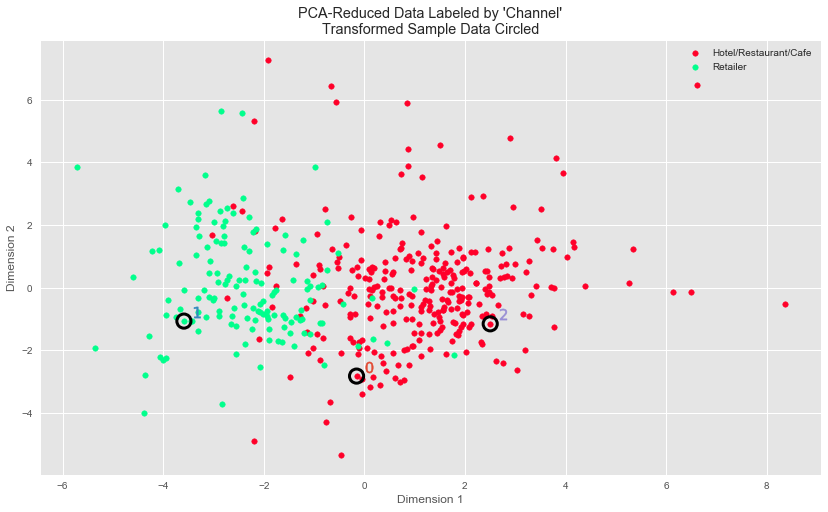

In [47]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**
- Both, the clustering outcome , as well as the actual dataset has two similar categories for classification of customers  -so there is a good match.For most of the data points, the 2 -cluster based clustering process has lead to a correct classification of customer segment based on the product-spend data.
However a few points appear to have been classified incorrectly by the GMM clustering algorithm - basically the points in the vicinty of the separation boundary between the clusters. Probably this is the best that could have been done looking at the distribution of data, it is difficult to imagine that K-Means may have done a better job in this case.

- At a broad-level,the 2 segment classification of 'Retailers' and 'Hotels/Restaurants/Cafes' is OK for most of the data points in this distribution.

- I was expecting a 3 to 4 segment classification -Had imagined that we would have segments for Restaurant, Cafe and Retail Store.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.